## BIKE SHARING ASSIGNMENT

# made by : ANKIT GUPTA

### Problem Statement : 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 






### OBJECTIVES OF THE ASSIGNMENT:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Data understanding and exploration

#### import the  required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#### filtering out the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import the dataset application data


In [3]:
df1=pd.read_csv("day.csv")


In [4]:
# check the dataset
df1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
# check the shape of the dataset
df1.shape

(730, 16)

In [6]:
# check the info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


as we seen that there are no null values in the dataset

In [7]:
# check the description of dataset
df1.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
# check the category of the season
df1['season'].dtype

dtype('int64')

as season is categorical variable we change it to category and map the season with their respective value


In [9]:
df1.loc[(df1['season'] == 1 ) , 'season'] = 'spring'
df1.loc[(df1['season'] == 2) , 'season'] = 'summer'
df1.loc[(df1['season'] == 3) , 'season'] = 'fall'
df1.loc[(df1['season'] == 4) , 'season'] = 'winter'

In [10]:
# fetch the counts for year
df1['yr'].value_counts()


1    365
0    365
Name: yr, dtype: int64

as 0 represent 2018 and 1 represent 2019 so we change the value of both

In [11]:
df1.loc[(df1['yr'] == 0 ) , 'yr'] = 2018
df1.loc[(df1['yr'] == 1 ) , 'yr'] = 2019

In [12]:
# check month column
df1['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
# change month column from numeric to its respective name 
import calendar
df1['mnth'] = df1['mnth'].apply(lambda x: calendar.month_abbr[x])

In [14]:
# check for holiday columns
df1['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# check for weekday column
df1['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [16]:
# change weekday column from numeric to its respective name
df1.loc[(df1['weekday'] == 0 ) , 'weekday'] = 'sunday'
df1.loc[(df1['weekday'] == 1 ) , 'weekday'] = 'monday'
df1.loc[(df1['weekday'] == 2 ) , 'weekday'] = 'tuesday'
df1.loc[(df1['weekday'] == 3 ) , 'weekday'] = 'wednesday'
df1.loc[(df1['weekday'] == 4 ) , 'weekday'] = 'thursday'
df1.loc[(df1['weekday'] == 5 ) , 'weekday'] = 'friday'
df1.loc[(df1['weekday'] == 6 ) , 'weekday'] = 'saturday'

In [17]:
# check for counts for working day
df1['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

as we seen it is binary column which means 0 mean no and 1 mean yes

In [18]:
# check for counts for weathersit 
df1['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
# change weathersit column from numeric to its respective name
df1.loc[(df1['weathersit'] == 1 ) , 'weathersit'] = 'clear'
df1.loc[(df1['weathersit'] == 2 ) , 'weathersit'] = 'cloudy'
df1.loc[(df1['weathersit'] == 3 ) , 'weathersit'] = 'light snow rain'
df1.loc[(df1['weathersit'] == 4 ) , 'weathersit'] = 'heavy rain'

In [20]:
df1['weathersit'].value_counts()

clear              463
cloudy             246
light snow rain     21
Name: weathersit, dtype: int64

## DATA VISUALISATION

### visualisation of numerical column


In [21]:
plt.scatter(x = df1['temp'],y = df1['cnt'])
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()


In [22]:
plt.scatter(x = df1['atemp'],y = df1['cnt'])
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()


In [23]:
plt.scatter(x = df1['windspeed'],y = df1['cnt'])
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()


In [24]:
plt.scatter(x = df1['hum'],y = df1['cnt'])
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

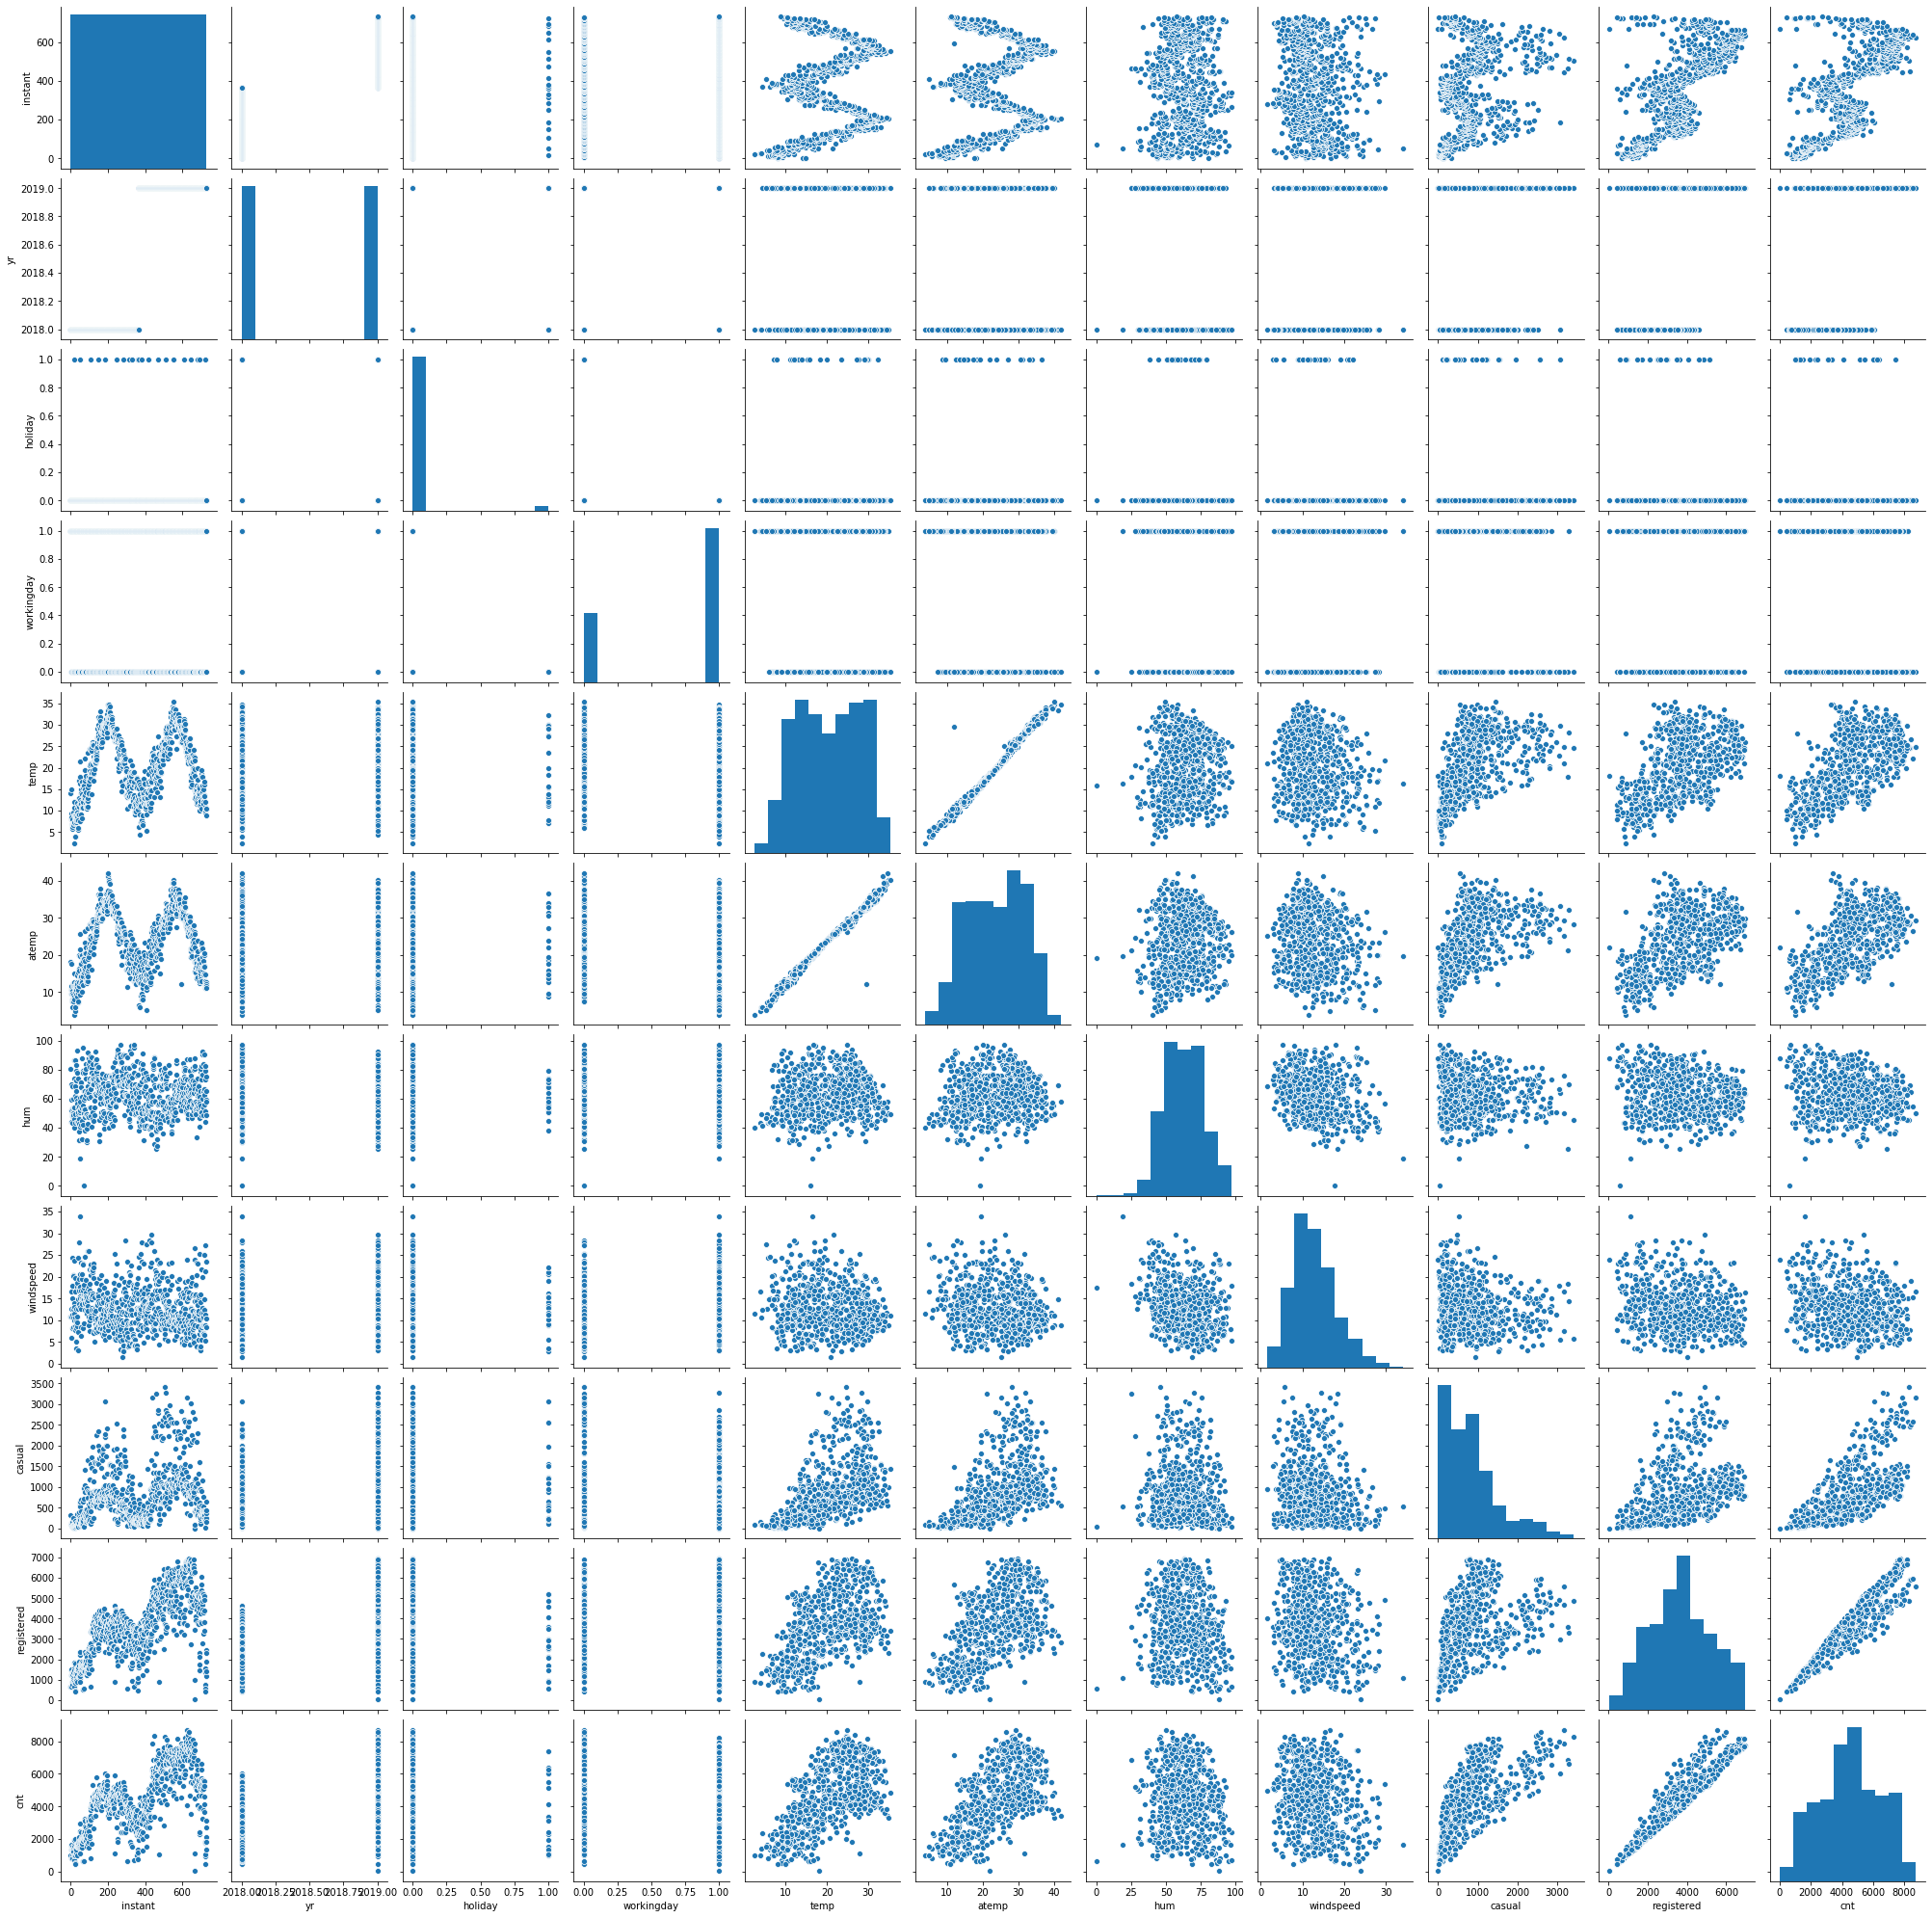

In [25]:
# perform multivariate ananlysis using pairplot
sns.pairplot(df1)
plt.show()

In [26]:
# convert date to datetimeformAT
from datetime import datetime 
datetime.strftime(datetime.strptime('2018-05-08','%Y-%m-%d'),'%Y-%m-%dT%H:%M:%S.%f')

'2018-05-08T00:00:00.000000'

## visualize categorical variable

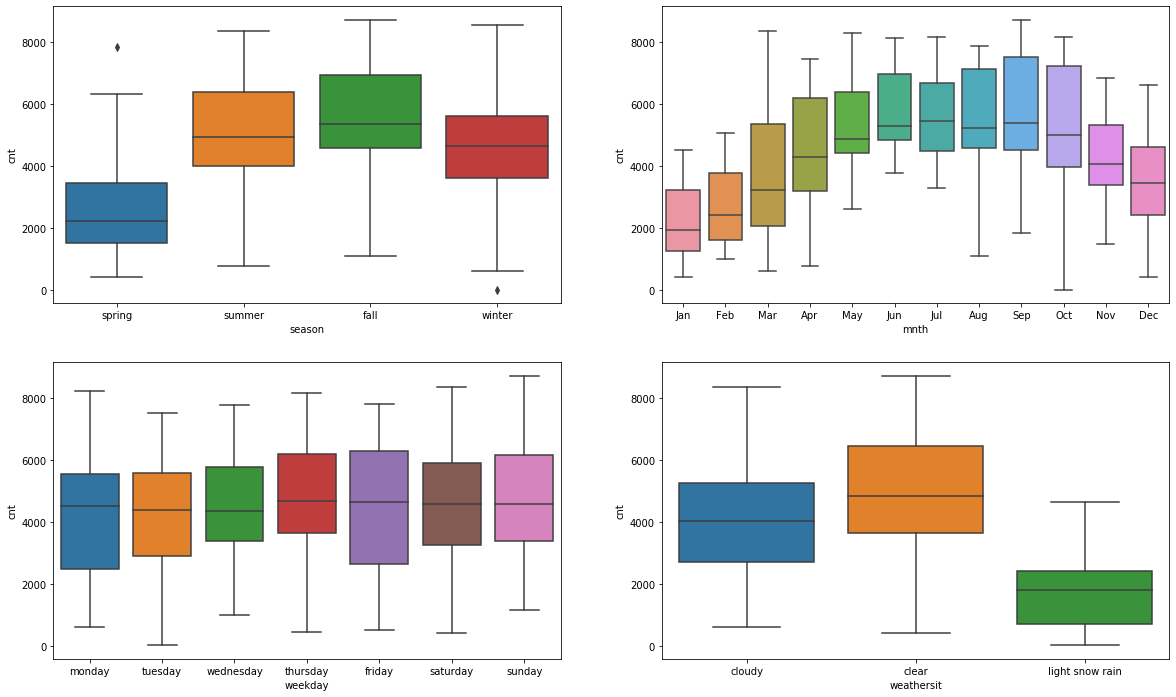

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.show()

We can see more rental bikes in summer and fall rather than in spring

The increase in the amount of rental bike is more in clear weather

Friday has the most number of times bikes are going for rent


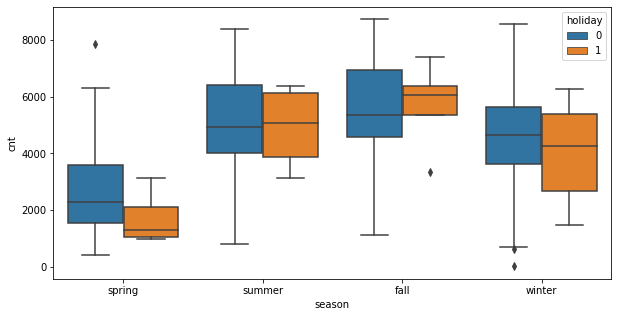

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df1)
plt.show()

In [29]:
## proceed with heatmap for better understanding of correlations
corr_ = df1.corr() 

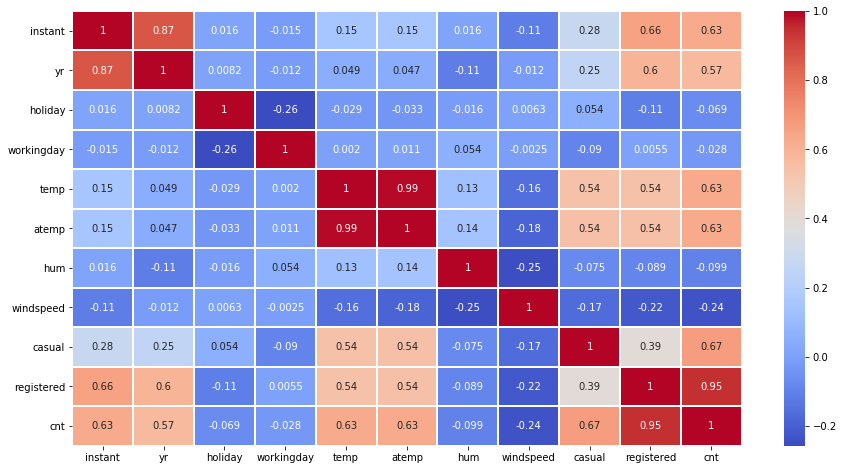

In [30]:
## plot heat map
plt.figure(figsize=[15,8])
sns.heatmap(corr_,cmap='coolwarm',linecolor='white', linewidths=1,annot = True)

as we can seen from heat map correlation of cnt with temp and atemp is same and also the highest from others 

holiday,workingday,hum,windspeed is negatively correlated with target variable cnt

## DATA PREPARATION 

### check the head of data 

In [31]:
df1.head()

instant      dteday  season    yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring  2018  Jan        0     monday           1   
1        2  02-01-2018  spring  2018  Jan        0    tuesday           1   
2        3  03-01-2018  spring  2018  Jan        0  wednesday           1   
3        4  04-01-2018  spring  2018  Jan        0   thursday           1   
4        5  05-01-2018  spring  2018  Jan        0     friday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1     cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

as we can see we dont need instant , dteday, casual,registered as it is not of any use as both casual and registered are target variable and we already have target variable which is the sum of both so we drop all 4 of these

In [32]:
df1.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

## DUMMY VARIABLE

The variable `weekday` has 7 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [33]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'week'
week = pd.get_dummies(df1['weekday'])

In [34]:
week.head(6)

friday  monday  saturday  sunday  thursday  tuesday  wednesday
0       0       1         0       0         0        0          0
1       0       0         0       0         0        1          0
2       0       0         0       0         0        0          1
3       0       0         0       0         1        0          0
4       1       0         0       0         0        0          0
5       0       0         1       0         0        0          0

Now, you don't need 7 columns. You can drop the friday column, as the type of weekday can be identified with just the last 6 columns where —

000000 will correspond to friday

100000 will correspond to monday

000010 will correspond to tuesday

000001 will correspond to wednesday

In [35]:
# Let's drop the first column from week df using 'drop_first = True'

week = pd.get_dummies(df1['weekday'], drop_first = True)

In [36]:
# Add the results to the original df1 dataframe

df1 = pd.concat([df1, week], axis = 1)

In [37]:
# Now let's see the head of our dataframe.

df1.head()

season    yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring  2018  Jan        0     monday           1     cloudy  14.110847   
1  spring  2018  Jan        0    tuesday           1     cloudy  14.902598   
2  spring  2018  Jan        0  wednesday           1      clear   8.050924   
3  spring  2018  Jan        0   thursday           1      clear   8.200000   
4  spring  2018  Jan        0     friday           1      clear   9.305237   

      atemp      hum  windspeed   cnt  monday  saturday  sunday  thursday  \
0  18.18125  80.5833  10.749882   985       1         0       0         0   
1  17.68695  69.6087  16.652113   801       0         0       0         0   
2   9.47025  43.7273  16.636703  1349       0         0       0         0   
3  10.60610  59.0435  10.739832  1562       0         0       0         1   
4  11.46350  43.6957  12.522300  1600       0         0       0         0   

   tuesday  wednesday  
0        0          0  
1        1          0  
2        0          1  
3        0          0  
4        0          0

In [38]:
# Drop 'weekday' as we have created the dummies for it

df1.drop(['weekday'], axis = 1, inplace = True)

In [39]:
df1.head()

season    yr mnth  holiday  workingday weathersit       temp     atemp  \
0  spring  2018  Jan        0           1     cloudy  14.110847  18.18125   
1  spring  2018  Jan        0           1     cloudy  14.902598  17.68695   
2  spring  2018  Jan        0           1      clear   8.050924   9.47025   
3  spring  2018  Jan        0           1      clear   8.200000  10.60610   
4  spring  2018  Jan        0           1      clear   9.305237  11.46350   

       hum  windspeed   cnt  monday  saturday  sunday  thursday  tuesday  \
0  80.5833  10.749882   985       1         0       0         0        0   
1  69.6087  16.652113   801       0         0       0         0        1   
2  43.7273  16.636703  1349       0         0       0         0        0   
3  59.0435  10.739832  1562       0         0       0         1        0   
4  43.6957  12.522300  1600       0         0       0         0        0   

   wednesday  
0          0  
1          0  
2          1  
3          0  
4          0

In [40]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(df1['weathersit'])

In [41]:
weather.head()

clear  cloudy  light snow rain
0      0       1                0
1      0       1                0
2      1       0                0
3      1       0                0
4      1       0                0

Now, you don't need three columns. You can drop the `clear` column, as the type of weather can be identified with just the last two columns where — 
- `00` will correspond to `clear`
- `01` will correspond to `light snow rain`
- `10` will correspond to `cloudy`

In [42]:
# Let's drop the first column from weather df using 'drop_first = True'

weather = pd.get_dummies(df1['weathersit'], drop_first = True)

In [43]:
# Add the results to the original df1 dataframe

df1 = pd.concat([df1, weather], axis = 1)

In [44]:
# Now let's see the head of our dataframe.

df1.head()

season    yr mnth  holiday  workingday weathersit       temp     atemp  \
0  spring  2018  Jan        0           1     cloudy  14.110847  18.18125   
1  spring  2018  Jan        0           1     cloudy  14.902598  17.68695   
2  spring  2018  Jan        0           1      clear   8.050924   9.47025   
3  spring  2018  Jan        0           1      clear   8.200000  10.60610   
4  spring  2018  Jan        0           1      clear   9.305237  11.46350   

       hum  windspeed   cnt  monday  saturday  sunday  thursday  tuesday  \
0  80.5833  10.749882   985       1         0       0         0        0   
1  69.6087  16.652113   801       0         0       0         0        1   
2  43.7273  16.636703  1349       0         0       0         0        0   
3  59.0435  10.739832  1562       0         0       0         1        0   
4  43.6957  12.522300  1600       0         0       0         0        0   

   wednesday  cloudy  light snow rain  
0          0       1                0  
1          0       1                0  
2          1       0                0  
3          0       0                0  
4          0       0                0

In [45]:
# Drop 'weathersit' as we have created the dummies for it

df1.drop(['weathersit'], axis = 1, inplace = True)

In [46]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(df1['mnth'])
month.head()

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    1    0    0    0    0    0    0    0

Now, you don't need 12  columns. You can drop the apr column, as the type of month can be identified with just the last 11 columns where —

00000000000 will correspond to apr

00010000000 will correspond to jan

and so on


In [47]:
# Let's drop the first column from mnth df using 'drop_first = True'

month= pd.get_dummies(df1['mnth'], drop_first = True)

In [48]:
# Add the results to the original df1 dataframe

df1 = pd.concat([df1, month], axis = 1)

In [49]:
# Now let's see the head of our dataframe.

df1.head()

season    yr mnth  holiday  workingday       temp     atemp      hum  \
0  spring  2018  Jan        0           1  14.110847  18.18125  80.5833   
1  spring  2018  Jan        0           1  14.902598  17.68695  69.6087   
2  spring  2018  Jan        0           1   8.050924   9.47025  43.7273   
3  spring  2018  Jan        0           1   8.200000  10.60610  59.0435   
4  spring  2018  Jan        0           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0  10.749882   985  ...    0    0    1    0    0    0    0    0    0    0  
1  16.652113   801  ...    0    0    1    0    0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    1    0    0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    1    0    0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    1    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [50]:
# Drop 'mnth' as we have created the dummies for it

df1.drop(['mnth'], axis = 1, inplace = True)

In [51]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seas'
seas = pd.get_dummies(df1['season'])
seas.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

Now, you don't need 4 columns. You can drop the fall column, as the type of season can be identified with just the last 3 columns where —

000 will correspond to fall

100 will correspond to spring

010 will corrospond to summer 

001 will corrospond to winter

 

In [52]:
# Let's drop the first column from season df using 'drop_first = True'

seas = pd.get_dummies(df1['season'], drop_first = True)

In [53]:
# Add the results to the original df1 dataframe

df1 = pd.concat([df1, seas], axis = 1)

In [54]:
# Drop 'season' as we have created the dummies for it

df1.drop(['season'], axis = 1, inplace = True)

In [55]:
# Now let's see the head of our dataframe.

df1.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0  2018        0           1  14.110847  18.18125  80.5833  10.749882   985   
1  2018        0           1  14.902598  17.68695  69.6087  16.652113   801   
2  2018        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3  2018        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4  2018        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   monday  saturday  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  spring  summer  \
0       1         0  ...    0    0    0    0    0    0    0       1       0   
1       0         0  ...    0    0    0    0    0    0    0       1       0   
2       0         0  ...    0    0    0    0    0    0    0       1       0   
3       0         0  ...    0    0    0    0    0    0    0       1       0   
4       0         0  ...    0    0    0    0    0    0    0       1       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 30 columns]

In [56]:
# Get the dummy variables for the feature 'yr' and store it in a new variable - 'year'
year = pd.get_dummies(df1['yr'])
year.head()

2018  2019
0     1     0
1     1     0
2     1     0
3     1     0
4     1     0

In [57]:
# Let's drop the first column from season df using 'drop_first = True'

year = pd.get_dummies(df1['yr'], drop_first = True)

In [58]:
# Add the results to the original df1 dataframe

df1 = pd.concat([df1, year], axis = 1)

In [59]:
# Drop 'yr' as we have created the dummies for it

df1.drop(['yr'], axis = 1, inplace = True)

## MODEL BUILDING AND EVALUATION 


###  Splitting the Data into Training and Testing Sets

In [60]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

### SCALING

now we have two scalimg methods to scale the data so that we have comaparable scale . we use min max scaling here 

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed','atemp','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [64]:
df_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  0.864243   
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           1  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   

     monday  saturday  sunday  ...  Jun  Mar  May  Nov  Oct  Sep  spring  \
653       0         0       0  ...    0    0    0    0    1    0       0   
576       0         0       0  ...    0    0    0    0    0    0       0   
426       0         0       1  ...    0    1    0    0    0    0       1   
728       1         0       0  ...    0    0    0    0    0    0       1   
482       0         0       1  ...    0    0    0    0    0    0       0   

     summer  winter  2019  
653       0       1     1  
576       0       0     1  
426       0       0     1  
728       0       0     1  
482       1       0     1  

[5 rows x 30 columns]

In [65]:
df_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.711765    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.453386    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      monday    saturday      sunday  ...         Jun  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513620    0.154902    0.129412    0.137255  ...    0.074510   
std      0.224593    0.362166    0.335985    0.344454  ...    0.262857   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Mar         May         Nov         Oct         Sep      spring  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.084314    0.086275    0.086275    0.080392    0.243137   
std      0.297660    0.278131    0.281045    0.281045    0.272166    0.429398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           summer     winter        2019  
count  510.000000  510.00000  510.000000  
mean     0.245098    0.24902    0.507843  
std      0.430568    0.43287    0.500429  
min      0.000000    0.00000    0.000000  
25%      0.000000    0.00000    0.000000  
50%      0.000000    0.00000    1.000000  
75%      0.000000    0.00000    1.000000  
max      1.000000    1.00000    1.000000  

[8 rows x 30 columns]

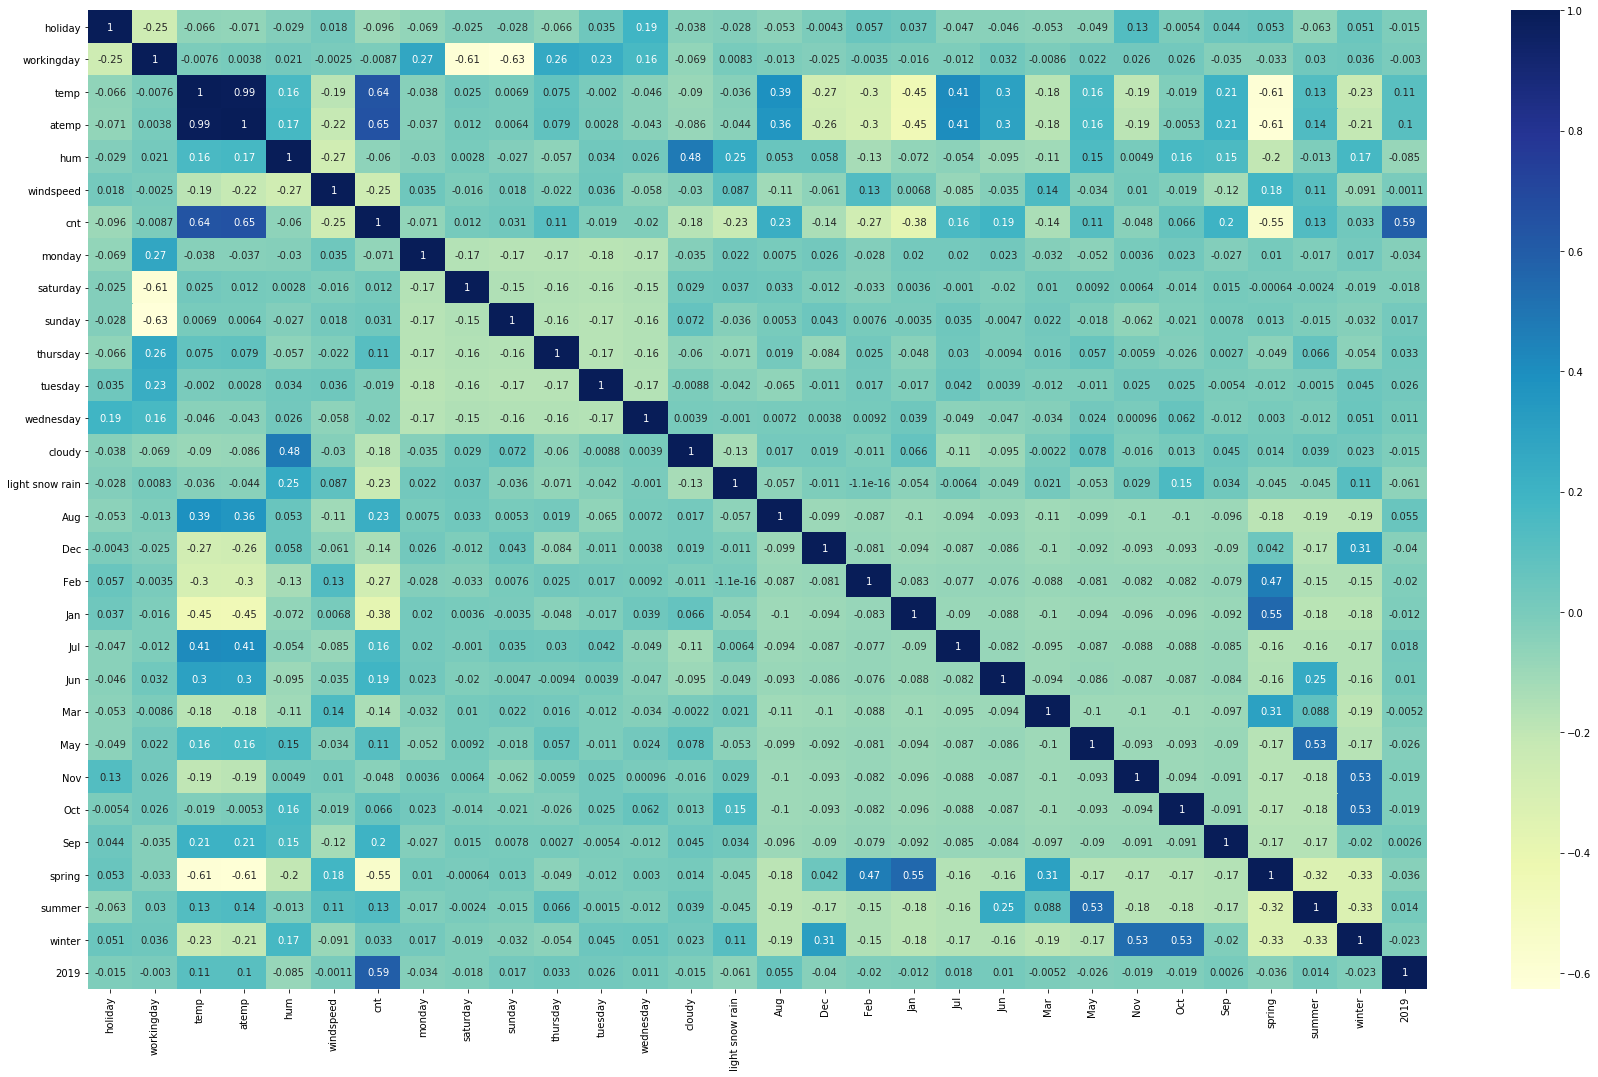

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

as we can seen from the heatmap cnt is highly correlated with temp and atemp
temp is highly correlated with atemp so we drop this variable

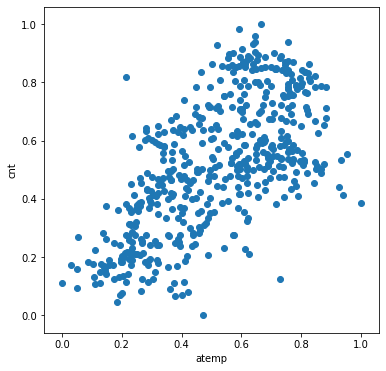

In [67]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

So, we pick atemp as the first variable and we'll try to fit a regression line to that.

 ## Dividing into X and Y sets for the model building

In [68]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [69]:


# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [70]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

In [71]:
# check the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.10e-61
Time:                        22:41:34   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

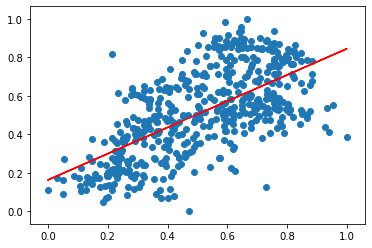

In [72]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1629 + 0.6823*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [73]:
# Add another constant
X_train_lm = sm.add_constant(X_train[['atemp','temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# check the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.95e-60
Time:                        22:41:34   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

as we seen that after adding temp variable the significance is lost so we remove it and add another variable

 ### Adding all the variables to the model


In [75]:
# Check all the columns of the dataframe

df1.columns

Index([        'holiday',      'workingday',            'temp',
                 'atemp',             'hum',       'windspeed',
                   'cnt',          'monday',        'saturday',
                'sunday',        'thursday',         'tuesday',
             'wednesday',          'cloudy', 'light snow rain',
                   'Aug',             'Dec',             'Feb',
                   'Jan',             'Jul',             'Jun',
                   'Mar',             'May',             'Nov',
                   'Oct',             'Sep',          'spring',
                'summer',          'winter',              2019],
      dtype='object')

In [76]:
#Build a linear model


X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.394765
holiday           -0.135245
workingday        -0.060878
temp               0.400268
atemp              0.046419
hum               -0.157757
windspeed         -0.181137
monday            -0.024668
saturday          -0.056309
sunday            -0.050307
thursday           0.003841
tuesday           -0.026341
wednesday         -0.011247
cloudy            -0.059311
light snow rain   -0.250902
Aug                0.023034
Dec               -0.045685
Feb               -0.037177
Jan               -0.063451
Jul               -0.033912
Jun                0.002144
Mar                0.000805
May                0.024765
Nov               -0.041530
Oct                0.005922
Sep                0.086720
spring            -0.044097
summer             0.041756
winter             0.110482
2019               0.230933
dtype: float64

In [77]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.09e-178
Time:                        22:41:35   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3948      0.085     

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2              temp  442.82
3             atemp  382.51
1        workingday   63.90
4               hum   41.21
25           spring   13.56
27           winter   12.53
8            sunday   12.35
7          saturday   11.84
26           summer    9.87
22              Nov    7.16
14              Aug    6.99
23              Oct    6.96
17              Jan    6.09
18              Jul    6.02
5         windspeed    5.87
15              Dec    5.78
24              Sep    5.08
16              Feb    4.50
20              Mar    3.72
19              Jun    3.10
0           holiday    2.82
21              May    2.45
12           cloudy    2.43
28             2019    2.14
10          tuesday    2.09
6            monday    2.09
9          thursday    2.04
11        wednesday    1.98
13  light snow rain    1.34

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

## Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, atemp as it has a very high p-value of 0.73. Let's go ahead and drop this variables

In [80]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [81]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.33e-179
Time:                        22:41:35   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3945      0.085     

In [83]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        workingday  63.89
2              temp  43.99
3               hum  41.17
24           spring  13.54
26           winter  12.51
7            sunday  12.35
6          saturday  11.83
25           summer   9.84
21              Nov   7.16
22              Oct   6.96
13              Aug   6.86
16              Jan   6.09
17              Jul   5.97
14              Dec   5.78
4         windspeed   5.59
23              Sep   5.06
15              Feb   4.50
19              Mar   3.72
18              Jun   3.04
0           holiday   2.82
20              May   2.43
11           cloudy   2.43
27             2019   2.14
9           tuesday   2.09
5            monday   2.09
8          thursday   2.04
10        wednesday   1.98
12  light snow rain   1.33

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable workingday has a significantly high VIF (63.89) and a high p-value (0.373) as well. Hence, this variable isn't of much use and should be dropped.

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [84]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('workingday', 1)

In [85]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          6.08e-180
Time:                        22:41:36   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3330      0.045     

In [87]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2               hum  37.70
1              temp  37.21
23           spring  11.88
25           winter  11.81
24           summer   7.03
21              Oct   6.44
20              Nov   6.07
12              Aug   5.95
16              Jul   5.35
15              Jan   5.22
3         windspeed   5.11
13              Dec   4.92
22              Sep   4.30
14              Feb   4.00
18              Mar   3.36
17              Jun   2.94
19              May   2.43
10           cloudy   2.39
26             2019   2.14
8           tuesday   2.06
4            monday   2.03
7          thursday   1.99
9         wednesday   1.94
6            sunday   1.92
5          saturday   1.85
11  light snow rain   1.32
0           holiday   1.12

humidity has a very high vif so we can drop humidity also 

In [88]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [89]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.63e-177
Time:                        22:41:36   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     483   BIC:                            -861.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2699      0.043     

In [91]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              temp  26.94
24           winter  11.59
22           spring  11.36
20              Oct   5.97
23           summer   5.92
11              Aug   5.72
19              Nov   5.47
15              Jul   5.28
2         windspeed   4.95
14              Jan   4.57
12              Dec   4.18
21              Sep   3.92
13              Feb   3.69
17              Mar   3.17
16              Jun   2.94
18              May   2.40
25             2019   2.11
7           tuesday   2.04
3            monday   2.03
6          thursday   1.98
8         wednesday   1.94
5            sunday   1.92
4          saturday   1.85
9            cloudy   1.63
10  light snow rain   1.12
0           holiday   1.12

In [92]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Oct', 1)

In [93]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [94]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.65e-178
Time:                        22:41:36   Log-Likelihood:                 514.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     484   BIC:                            -867.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2645      0.039     

In [95]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              temp  23.64
21           spring  10.79
23           winter   5.99
22           summer   5.64
2         windspeed   4.91
11              Aug   4.90
15              Jul   4.54
14              Jan   3.94
13              Feb   3.12
20              Sep   2.84
17              Mar   2.62
16              Jun   2.60
18              May   2.23
24             2019   2.11
7           tuesday   2.03
3            monday   2.00
6          thursday   1.97
8         wednesday   1.92
5            sunday   1.90
19              Nov   1.87
12              Dec   1.84
4          saturday   1.84
9            cloudy   1.62
0           holiday   1.12
10  light snow rain   1.11

In [96]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('spring', 1)

In [97]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     110.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          5.19e-179
Time:                        22:41:37   Log-Likelihood:                 513.64
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     485   BIC:                            -871.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2344      0.034     

In [99]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              temp  20.82
2         windspeed   4.63
22           winter   4.09
11              Aug   3.93
15              Jul   3.68
21           summer   3.54
16              Jun   2.48
20              Sep   2.44
18              May   2.23
23             2019   2.11
7           tuesday   2.00
6          thursday   1.95
3            monday   1.94
8         wednesday   1.89
5            sunday   1.88
19              Nov   1.82
4          saturday   1.80
17              Mar   1.66
14              Jan   1.64
9            cloudy   1.62
13              Feb   1.58
12              Dec   1.46
0           holiday   1.12
10  light snow rain   1.11

In [100]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Jul', 1)

In [101]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [102]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.81e-180
Time:                        22:41:37   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     486   BIC:                            -877.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2345      0.034     

In [103]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1              temp  8.75
2         windspeed  4.57
21           winter  2.88
20           summer  2.80
22             2019  2.10
7           tuesday  1.99
6          thursday  1.95
3            monday  1.93
8         wednesday  1.89
17              May  1.89
5            sunday  1.87
11              Aug  1.83
18              Nov  1.82
4          saturday  1.80
15              Jun  1.62
9            cloudy  1.62
14              Jan  1.53
12              Dec  1.45
19              Sep  1.44
13              Feb  1.43
16              Mar  1.40
10  light snow rain  1.11
0           holiday  1.11

In [104]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('thursday', 1)

In [105]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.81e-180
Time:                        22:41:37   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     486   BIC:                            -877.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2345      0.034     

In [107]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1              temp  7.28
2         windspeed  4.55
20           winter  2.82
19           summer  2.72
21             2019  2.10
16              May  1.89
10              Aug  1.83
17              Nov  1.82
8            cloudy  1.61
14              Jun  1.60
6           tuesday  1.53
3            monday  1.50
7         wednesday  1.50
5            sunday  1.47
18              Sep  1.44
11              Dec  1.44
13              Jan  1.44
4          saturday  1.43
15              Mar  1.37
12              Feb  1.35
0           holiday  1.11
9   light snow rain  1.10

In [108]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1)

In [109]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [110]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     98.96
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          8.98e-161
Time:                        22:41:37   Log-Likelihood:                 461.78
No. Observations:                 510   AIC:                            -879.6
Df Residuals:                     488   BIC:                            -786.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5417      0.018     

In [111]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         windspeed  3.86
19           winter  2.73
18           summer  2.71
20             2019  1.91
16              Nov  1.81
15              May  1.74
7            cloudy  1.61
5           tuesday  1.44
6         wednesday  1.44
10              Dec  1.43
2            monday  1.43
12              Jan  1.40
4            sunday  1.39
14              Mar  1.37
9               Aug  1.35
3          saturday  1.35
11              Feb  1.34
13              Jun  1.31
17              Sep  1.23
0           holiday  1.11
8   light snow rain  1.09

In [112]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('summer', 1)

In [113]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [114]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          8.68e-162
Time:                        22:41:38   Log-Likelihood:                 461.78
No. Observations:                 510   AIC:                            -881.6
Df Residuals:                     489   BIC:                            -792.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5417      0.017     

In [115]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         windspeed  3.46
18           winter  2.61
19             2019  1.89
16              Nov  1.80
7            cloudy  1.58
5           tuesday  1.43
6         wednesday  1.42
10              Dec  1.41
2            monday  1.41
4            sunday  1.39
14              Mar  1.37
3          saturday  1.34
12              Jan  1.31
9               Aug  1.28
11              Feb  1.26
15              May  1.26
13              Jun  1.20
17              Sep  1.19
0           holiday  1.11
8   light snow rain  1.09

In [116]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('saturday', 1)

In [117]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [118]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          8.22e-163
Time:                        22:41:38   Log-Likelihood:                 461.77
No. Observations:                 510   AIC:                            -883.5
Df Residuals:                     490   BIC:                            -798.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5422      0.016     

In [119]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         windspeed  3.32
17           winter  2.59
18             2019  1.88
15              Nov  1.80
6            cloudy  1.57
9               Dec  1.41
13              Mar  1.36
5         wednesday  1.33
4           tuesday  1.33
2            monday  1.31
3            sunday  1.30
11              Jan  1.29
10              Feb  1.26
8               Aug  1.25
14              May  1.24
12              Jun  1.19
16              Sep  1.17
0           holiday  1.11
7   light snow rain  1.09

In [120]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('sunday', 1)

In [121]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [122]:
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          8.99e-164
Time:                        22:41:38   Log-Likelihood:                 461.59
No. Observations:                 510   AIC:                            -885.2
Df Residuals:                     491   BIC:                            -804.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5441      0.016     

In [123]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         windspeed  3.22
16           winter  2.57
17             2019  1.87
14              Nov  1.80
5            cloudy  1.55
8               Dec  1.40
12              Mar  1.35
10              Jan  1.28
4         wednesday  1.27
9               Feb  1.26
3           tuesday  1.26
2            monday  1.25
7               Aug  1.24
13              May  1.24
11              Jun  1.18
15              Sep  1.17
0           holiday  1.11
6   light snow rain  1.09

In [124]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('wednesday', 1)

In [125]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [126]:
# Print the summary of the model

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.93e-164
Time:                        22:41:38   Log-Likelihood:                 460.22
No. Observations:                 510   AIC:                            -884.4
Df Residuals:                     492   BIC:                            -808.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5398      0.016     

In [127]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         windspeed  3.20
15           winter  2.51
16             2019  1.86
13              Nov  1.79
4            cloudy  1.55
7               Dec  1.40
11              Mar  1.35
9               Jan  1.27
8               Feb  1.25
6               Aug  1.23
12              May  1.23
3           tuesday  1.21
2            monday  1.21
10              Jun  1.18
14              Sep  1.17
5   light snow rain  1.09
0           holiday  1.07

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

##  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [128]:
y_train_price = lr_13.predict(X_train_lm)

Text(0.5, 0, 'Errors')

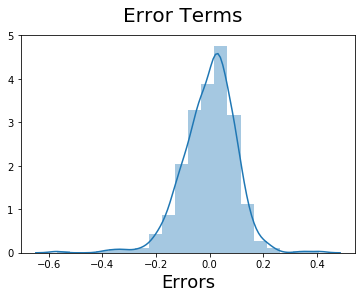

In [129]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. thirteenth model.

#### Applying the scaling on the test sets

In [130]:
num_vars = ['temp','hum', 'windspeed','atemp','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [131]:
df_test.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.036530    0.639269    0.558941    0.532991    0.638508    0.313350   
std      0.188034    0.481313    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      0.000000    1.000000    0.558691    0.549198    0.627737    0.299459   
75%      0.000000    1.000000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

              cnt      monday    saturday      sunday  ...         Jun  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.520592    0.118721    0.173516    0.155251  ...    0.095890   
std      0.218435    0.324202    0.379560    0.362974  ...    0.295115   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.377531    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524275    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.672745    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Mar         May         Nov         Oct         Sep      spring  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.054795    0.086758    0.073059    0.082192    0.086758    0.255708   
std      0.228100    0.282125    0.260830    0.275286    0.282125    0.437258   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           summer      winter        2019  
count  219.000000  219.000000  219.000000  
mean     0.264840    0.232877    0.479452  
std      0.442259    0.423633    0.500722  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

#### Dividing into X_test and y_test

In [132]:
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
# Adding constant variable to test dataframe
X_test_m13 = sm.add_constant(X_test)

In [135]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m13 = X_test_m13.drop(['wednesday','atemp','workingday','hum','Oct','spring','Jul','thursday','temp','summer','saturday','sunday'], axis = 1)

In [136]:
# Making predictions using the thirtenth model

y_pred_m13 = lr_13.predict(X_test_m13)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

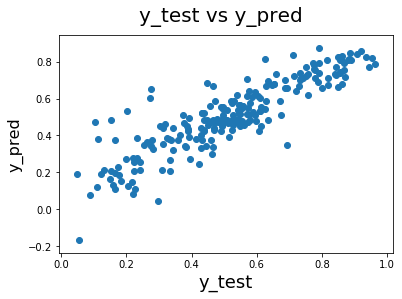

In [137]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:
cnt = 0.5397 -0.0866 * holiday - 0.1901 * windspeed - 0.0367 * monday - 0.03031 * tuesday - 0.08839 * cloudy  - 0.302297 *light snow rain + 0.0755 * Aug - 0.17954 * Dec - 0.23953 * Feb - 0.30380 * Jan + 0.07771 * Jun - 0.11708 * Mar + 0.04909 * May - 0.12153 * Nov + 0.09837 * Sep + 0.0659 * winter + 0.246092 * 2019


1. As we can see that our sell increase in 2019

2. in winter sell is also increase

3.in the month of june and may it is increased